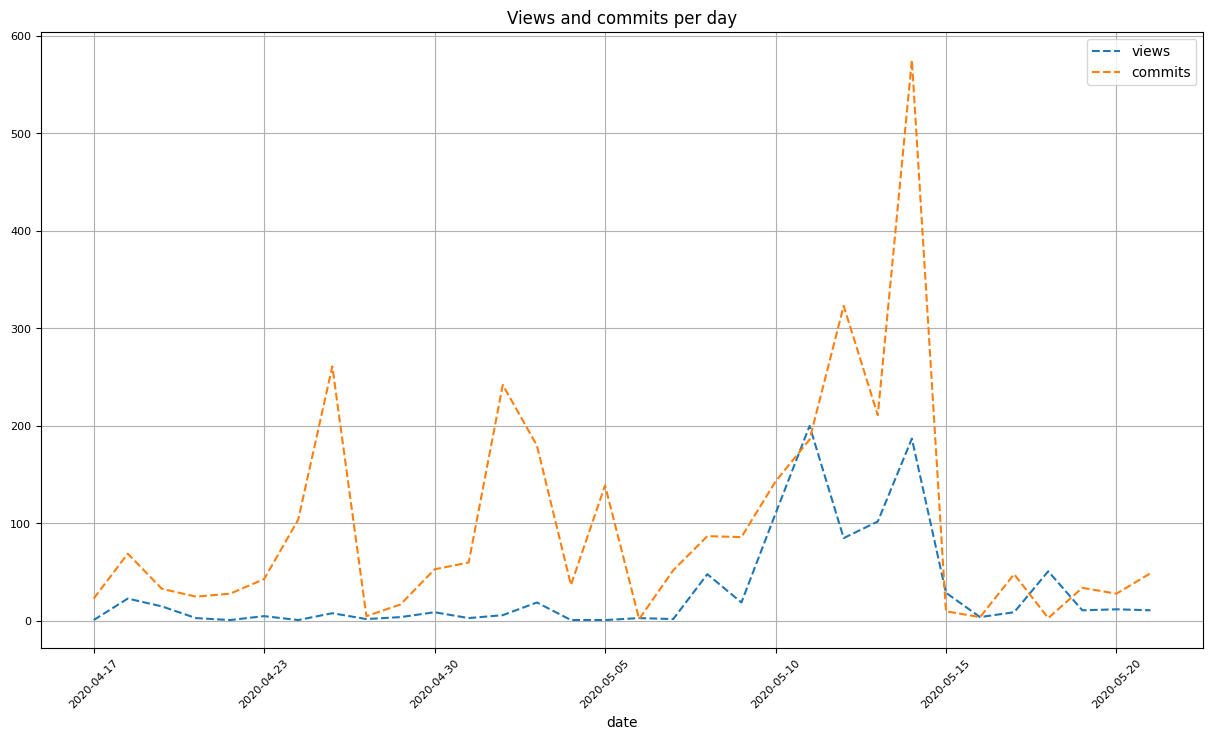

In [6]:
import pandas as pd
import sqlite3

conn = sqlite3.connect('../../datasets/data/checking-logs.sqlite')

query_views = """
SELECT DATE(datetime) AS view_date
FROM pageviews
WHERE uid LIKE 'user_%'
"""

query_commits = """
SELECT DATE(timestamp) AS commit_date
FROM checker
WHERE uid LIKE 'user_%'
"""

views_df = pd.read_sql_query(query_views, conn)
commits_df = pd.read_sql_query(query_commits, conn)

daily_views = views_df.groupby('view_date').size().reset_index(name='views')
daily_commits = commits_df.groupby('commit_date').size().reset_index(name='commits')

merged_df = pd.merge(daily_views, daily_commits, left_on='view_date', right_on='commit_date', how='inner')
merged_df = merged_df.rename(columns={'view_date': 'date'})
merged_df = merged_df[['date', 'views', 'commits']] 


ax = merged_df.plot(
    x='date',              
    y=['views', 'commits'],
    kind='line',           
    figsize=(15, 8),       
    title='Views and commits per day', 
    rot=45,                
    fontsize=8,           
    grid=True,             
    legend=True,
    linestyle='--'       
)

ax.set_xlabel('date', fontsize=10)

conn.close()

“How many times was the number of views larger than 150?” 
“The answer
is 2”.